In [2]:
def gibbs_sampler(initial_point, num_samples, mean, cov):

    point = np.array(initial_point)
    samples = np.empty([num_samples + 1, 2]) # Creates an empty numpy array with shape (num_samples+1, 2)

    samples[0] = point
    tmp_points = np.empty([num_samples, 2]) #inbetween points

    for i in range(num_samples):
        # Sample from p(x_0|x_1)
        point = conditional_sampler(0, point, mean, cov)
        tmp_points[i] = point
        # Sample from p(x_1|x_0)
        point = conditional_sampler(1, point, mean, cov)
        samples[i+1] = point

    return samples, tmp_points

def conditional_sampler(sampling_index, current_x, mean, cov):
    
    conditioned_index = 1 - sampling_index 

    a = cov[sampling_index, sampling_index]
    b = cov[sampling_index, conditioned_index]
    c = cov[conditioned_index, conditioned_index]
  
    mu = mean[sampling_index] + (b * (current_x[conditioned_index] - mean[conditioned_index]))/c
    
    sigma = np.sqrt(a-(b**2)/c)
    new_x = np.copy(current_x)
    new_x[sampling_index] = np.random.randn()*sigma + mu
    
    return new_x

In [26]:
initial_point = [-9.0, -9.0]
num_samples = 5000

mean = np.array([0, 0])
cov = np.array([[10, 3], 
                [3, 5]])

d = gibbs_sampler(initial_point, num_samples, mean, cov)

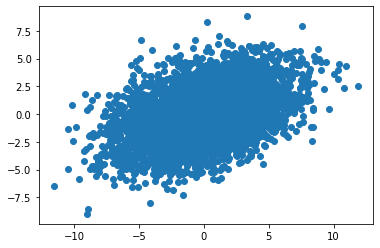

In [27]:
plt.scatter(pd.DataFrame(d[0])[0], pd.DataFrame(d[0])[1])

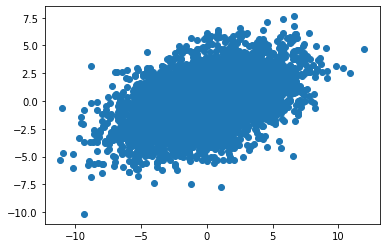

In [28]:
s = np.random.multivariate_normal(mean, cov, size = (5000,))
plt.scatter(pd.DataFrame(s)[0], pd.DataFrame(s)[1])